# Image Features

Learning NxN image features using k-means

In [1]:
import numpy as np
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt  # for imshow
import matplotlib.colors as colors
import matplotlib.patches as patches
from scipy.cluster import vq     # for k-means and vq
import random

%matplotlib inline

Read in an image, convert to grayscale if RGB, and apply local contrast normalisation.  Note that some images will be RGB, some will be RGBA (e.g. door.bmp; 'A' sprecifies transparency), and some will be grayscale.

(-0.5, 319.5, 234.5, -0.5)

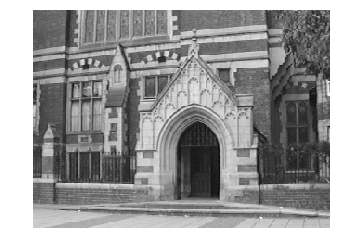

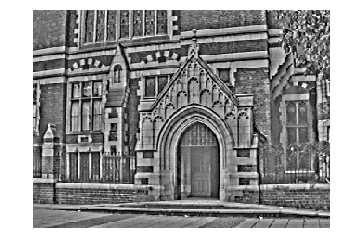

In [2]:
im = plt.imread('door.bmp')
im = im/255    # convert to float in interval [0 1]
gim = np.mean(im[:,:,0:3],axis=2)    # find mean of RGB to create a 2D grayscale image (could be RGBA)
#gim = im

plt.imshow(gim, cmap='gray')
plt.axis('off')

# perform local contrast normlisation
sgim = ndimage.gaussian_filter(gim,4)    # smooth the intensity image ('reflect' at boundaries)
dev = (gim-sgim)
V = ndimage.gaussian_filter(dev*dev,4)    # smooth the variance
gim = dev / np.maximum(np.sqrt(V), 0.1)

# Gray-levels are no longer in the interval [0 1], so provide normalisation to imshow
plt.figure()
norm = colors.Normalize(vmin=gim.min()/2, vmax=gim.max()/2)
plt.imshow(gim, cmap='gray', norm=norm)
plt.axis('off')

Define key parameter values.
Extract P random NxN patches from the image and 'vectorize' into a 2D array X with a row for each patch and $N^2$ columns for the intensity values of the patch.
Call kmeans, returning a $KxN^2$ codebook of generated prototypes (centroids).
Display the codebook.
Now encode all patches using the codebook (i.e. 'vector quantisation').
Finally, turn off normalisation for colour mapping, and install the codebook as the colourmap. This means that the integer coded values will index directly into the corresponding entry in the colourmap.

(-0.5, 304.5, 219.5, -0.5)

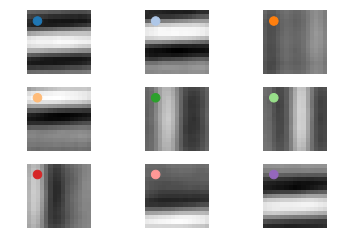

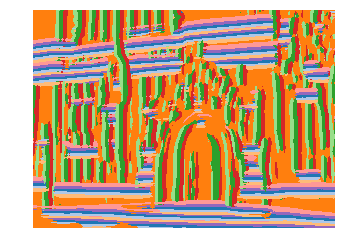

In [3]:
N = 15      # size of patch
K = 9       # number of prototypes for kmeans
P = 20000   # number of randomly selected patches

R = gim.shape[0]    # number of rows in image
C = gim.shape[1]    # number of columns in image

X = np.zeros((P,N*N),dtype=float) # initialise array for random patches

for i in range(0, P):
    r = random.randint(0,R-N)
    c = random.randint(0,C-N)
    patch = gim[r:r+N,c:c+N] 
    X[i,:] = np.reshape(patch,(-1))

codebook, distortion = vq.kmeans(X,K)

spn = np.ceil(np.sqrt(K))    # size of subplot display
norm = colors.Normalize(vmin=codebook.min(), vmax=codebook.max())    # set gray range from minimum to maximum
for i in range(0,K):
    plt.subplot(spn,spn,i+1)
    plt.imshow(np.reshape(codebook[i,:],(N,N)),cmap='gray',norm=norm)
    plt.gca().add_patch(patches.Circle((2,2), radius=1, color=plt.cm.tab20(i)))
    plt.axis('off')    # turn off the axes
    
X = np.zeros(((R-N)*(C-N),N*N),dtype=float)   # initialise array for all patches
i=0
for r in range(0,R-N):
    for c in range(0,C-N):
        X[i,:] = np.reshape(gim[r:r+N,c:c+N],(-1))
        i=i+1

code, dist = vq.vq(X,codebook)
code = np.reshape(code,(R-N,C-N))    # reshape the 1D code array into the original 2D image shape

# to give each label a unique colour, turn off normalisation in order to index directly into discrete colour map
plt.figure()
norm = colors.NoNorm()
plt.imshow(code, cmap='tab20', norm=norm)
plt.axis('off')    # turn off the axes